# 2.4.2 Combining Data with Pandas

This project is using the same data set like the previous project (2.5 Data Aggregation). The data set is contains information from the 2015 World Happiness Report including happiness scores for over 150 countries as well as contributing factors for that score. In addition to the 2015 World Happiness Report, this project will use the 2016 and 2017 reports.

## Reading in the data sets

Reading the data sets into pandas.

In [6]:
import pandas as pd
happiness2015 = pd.read_csv("World_Happiness_2015.csv")
happiness2016 = pd.read_csv("World_Happiness_2016.csv")
happiness2017 = pd.read_csv("World_Happiness_2017.csv")

Adding a column for every data set containing the year of the report.

In [12]:
happiness2015["Year"] = 2015
happiness2016["Year"] = 2016
happiness2017["Year"] = 2017

## Using the concat() function

Creating subsets that will be used for the concat() function.

In [20]:
head_2015 = happiness2015[['Country','Happiness Score', 'Year']].head(3)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)

Using the concat() function to combine both subsets.

In [21]:
# Default concat is axis=0
concat_axis0 = pd.concat([head_2015, head_2016])

In [22]:
concat_axis1 = pd.concat([head_2015, head_2016], axis=1)

Inspecting the number of rows for both dataframes

In [23]:
print(concat_axis0.shape[0])
print(concat_axis1.shape[0])

6
3


Finding out if the concat() function is usable for subsets with a different amount of rows.

In [25]:
head_2015 = happiness2015[['Country','Happiness Score', 'Year']].head(4)
concat_axis0 = pd.concat([head_2015, head_2016])
# Inspecting the number of rows and columns of concat_axis0
print(concat_axis0.shape[0]) # rows
print(concat_axis0.shape[1]) # columns
concat_axis0

7
3


,Country,Happiness Score,Year
0,Switzerland,7.587,2015
1,Iceland,7.561,2015
2,Denmark,7.527,2015
3,Norway,7.522,2015
0,Denmark,7.526,2016
1,Switzerland,7.509,2016
2,Iceland,7.501,2016


The code above shows that the concat() function can be used with to sets with a different amount of columns. Furthermore, the indexes stayed the same which could lead to potential conflicts in the future. 

In [28]:
concat_update_index = pd.concat([head_2015, head_2016], 
                               ignore_index=True)
concat_update_index

,Country,Happiness Score,Year
0,Switzerland,7.587,2015
1,Iceland,7.561,2015
2,Denmark,7.527,2015
3,Norway,7.522,2015
4,Denmark,7.526,2016
5,Switzerland,7.509,2016
6,Iceland,7.501,2016


In order to clear an existing index and reset the results, the ignore_index parameter can be used.

## Using the merge() function

Creating subsets for the merge() function

In [34]:
three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]
print(three_2015)
print(three_2016)

   Country  Happiness Rank  Year
2  Denmark               3  2015
3   Norway               4  2015
4   Canada               5  2015
   Country  Happiness Rank  Year
2  Iceland               3  2016
3   Norway               4  2016
4  Finland               5  2016


Merging the two subsets with the column 'Country' as the key to join.

In [37]:
merged = pd.merge(left=three_2015, right=three_2016, on='Country')
merged

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Norway,4,2015,4,2016


Since Norway is the only country that appears in both subsets it is also the only country that is getting merged by the merge() function. This can be explained by the inner join that is getting executed by the merge() function.

For the merge() function, different joins can be executed including inner join, outer join, left join and right join.

In [41]:
# Setting the how parameter to left to execute a left join. 
merged_left = pd.merge(left=three_2015, right=three_2016, on='Country', how='left')
# Using a left join again but switch the subsets.
merged_left_updated = pd.merge(left=three_2016, right=three_2015, on='Country', how='left')
print(merged_left)
print(" ")
print(merged_left_updated)

   Country  Happiness Rank_x  Year_x  Happiness Rank_y  Year_y
0  Denmark                 3    2015               NaN     NaN
1   Norway                 4    2015               4.0  2016.0
2   Canada                 5    2015               NaN     NaN
 
   Country  Happiness Rank_x  Year_x  Happiness Rank_y  Year_y
0  Iceland                 3    2016               NaN     NaN
1   Norway                 4    2016               4.0  2015.0
2  Finland                 5    2016               NaN     NaN


Using the left join creates a different object than inner join. It creates more rows and fills empty data points with NaN. Furthermore, the order of the subsets matters, too. By switching the left and right parameter the results differ.
<br>
Also, the merge() function added _x and _y to distinguish between columns with the same name.

Changing the suffixes to the respective year for a better understanding for users of the data set.

In [47]:
merged_suffixes = pd.merge(left=three_2015, right=three_2016, on='Country',
                 suffixes=('_2015','_2016'), how='left')
merged_updated_suffixes = pd.merge(left=three_2016, right=three_2015, how='left',
                                   on='Country', suffixes=('_2016', '_2015'))
print(merged_suffixes)
print(merged_updated_suffixes)

   Country  Happiness Rank_2015  Year_2015  Happiness Rank_2016  Year_2016
0  Denmark                    3       2015                  NaN        NaN
1   Norway                    4       2015                  4.0     2016.0
2   Canada                    5       2015                  NaN        NaN
   Country  Happiness Rank_2016  Year_2016  Happiness Rank_2015  Year_2015
0  Iceland                    3       2016                  NaN        NaN
1   Norway                    4       2016                  4.0     2015.0
2  Finland                    5       2016                  NaN        NaN


## Joining dataframes by index

Creating two subsets of happiness2015 and happiness2016.

In [48]:
four_2015 = happiness2015[['Country','Happiness Rank', 'Year']].iloc[2:6]
four_2015

,Country,Happiness Rank,Year
2,Denmark,3,2015
3,Norway,4,2015
4,Canada,5,2015
5,Finland,6,2015


In [49]:
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016

,Country,Happiness Rank,Year
2,Iceland,3,2016
3,Norway,4,2016
4,Finland,5,2016


Merging both subsets by index using inner join.

In [52]:
merge_index = pd.merge(left=four_2015, right=three_2016, left_index=True,
                     right_index=True, suffixes=('_2015','_2016'))
merge_index

,Country_2015,Happiness Rank_2015,Year_2015,Country_2016,Happiness Rank_2016,Year_2016
2,Denmark,3,2015,Iceland,3,2016
3,Norway,4,2015,Norway,4,2016
4,Canada,5,2015,Finland,5,2016


The result shows that merging two sets via index will return only indexes that occur in both sets. In this example, index number 5 from four_2015 can not be found in the new object since there is no other index in the other subset.

Merging both subsets by index left join

In [56]:
merge_index_left = pd.merge(left=four_2015, right=three_2016, left_index=True,
                     right_index=True, suffixes=('_2015','_2016'), how='left')
merge_index_left

,Country_2015,Happiness Rank_2015,Year_2015,Country_2016,Happiness Rank_2016,Year_2016
2,Denmark,3,2015,Iceland,3.0,2016.0
3,Norway,4,2015,Norway,4.0,2016.0
4,Canada,5,2015,Finland,5.0,2016.0
5,Finland,6,2015,NaN,NaN,NaN


In contrast to the inner join, using the left join returns all indexes from the first data set (four_2015). Since the number of rows and indexes of the second set is short by one row, the result is filling the empty data points by NaN.

## Short analysis

Next, we want to analyze how the mean happiness score changed from 2015 to 2017. The first step is to create a pivot table to calculate the mean score for each region.

In [57]:
import numpy as np
means=happiness2015.pivot_table('Happiness Score','Region',
                               aggfunc=np.mean)
means

,Happiness Score
Region,
Australia and New Zealand,7.285000
Central and Eastern Europe,5.332931
Eastern Asia,5.626167
Latin America and Caribbean,6.144682
Middle East and Northern Africa,5.406900
North America,7.273000
Southeastern Asia,5.317444
Southern Asia,4.580857
Sub-Saharan Africa,4.202800


In [59]:
happiness2017.head(5)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Year
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017


The happiness score column name from happiness 2017 differs from the other two dataframes and has to be renamed.

In [60]:
happiness2017.rename(columns={'Happiness.Score':'Happiness Score'},
                    inplace=True)

In [61]:
happiness2017.head()

,Country,Happiness.Rank,Happiness Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Year
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017


Next, the three dataframes from each year have to be combined to analyze differences in the happiness score for each year.

In [69]:
combined = pd.concat([happiness2015,happiness2016,happiness2017], sort=False)
combined

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Year,Lower Confidence Interval,Upper Confidence Interval,Happiness.Rank,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Health..Life.Expectancy.,Trust..Government.Corruption.,Dystopia.Residual
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.349510,0.94143,0.665570,0.41978,...,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.402230,0.94784,0.628770,0.14145,...,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.360580,0.87464,0.649380,0.48357,...,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.330950,0.88521,0.669730,0.36503,...,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.322610,0.90563,0.632970,0.32957,...,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Finland,Western Europe,6.0,7.406,0.03140,1.29025,1.318260,0.88911,0.641690,0.41372,...,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Netherlands,Western Europe,7.0,7.378,0.02799,1.32944,1.280170,0.89284,0.615760,0.31814,...,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Sweden,Western Europe,8.0,7.364,0.03157,1.33171,1.289070,0.91087,0.659800,0.43844,...,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,New Zealand,Australia and New Zealand,9.0,7.286,0.03371,1.25018,1.319670,0.90837,0.639380,0.42922,...,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Australia,Australia and New Zealand,10.0,7.284,0.04083,1.33358,1.309230,0.93156,0.651240,0.35637,...,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Using a pivot table to aggregate the mean happiness score for every year.

In [71]:
pivot_table_combined = combined.pivot_table(index="Year",
                                           values="Happiness Score",
                                           aggfunc=np.mean)
pivot_table_combined

,Happiness Score
Year,
2015,5.375734
2016,5.382185
2017,5.354019


Plotting the pivot table to visualize the mean happiness score of each year.

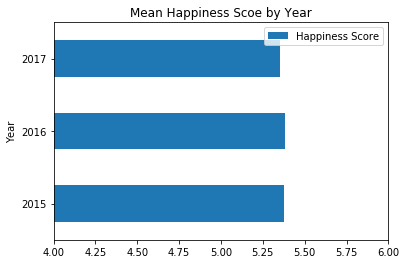

In [75]:
pivot_table_combined.plot(kind='barh', title='Mean Happiness Scoe by Year',
                         xlim=(4,6))

The plot shows that there has not been a huge change in the happiness score from 2015 to 2017. In 2017, the happiness score decreased slightly.

## Conclusion

In this project I learned to use the pd.concat() and pd.merge() function. In addition, I learned that the type of join will impact the resulting object in both functions.